<h2>AI-Driven Inventory Data Cleaning & Preprocessing </h2>

Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt  

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

Loading the Dataset

In [4]:
df=pd.read_csv("retail_store_inventory.csv")

In [6]:
df=pd.read_csv("retail_store_inventory.csv")
df.head(100)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Stock Status,Sales Efficiency
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Sufficient Stock,2.267857
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Sufficient Stock,2.238806
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,Sufficient Stock,1.250000
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Sufficient Stock,0.369697
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Sufficient Stock,0.102941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-01,S005,P0016,Clothing,South,71,11,32,1.85,16.30,5,Sunny,0,17.98,Winter,Sufficient Stock,0.333333
96,2022-01-01,S005,P0017,Electronics,East,388,371,98,390.04,98.31,15,Sunny,1,102.42,Spring,Sufficient Stock,3.747475
97,2022-01-01,S005,P0018,Furniture,West,161,107,66,103.97,48.96,10,Snowy,1,50.03,Spring,Sufficient Stock,1.597015
98,2022-01-01,S005,P0019,Groceries,South,235,106,124,119.33,88.22,5,Rainy,0,91.16,Spring,Sufficient Stock,0.848000


<h2>Data Exploration<h2>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72385 entries, 0 to 72384
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                72385 non-null  object 
 1   Store ID            72385 non-null  object 
 2   Product ID          72385 non-null  object 
 3   Category            72385 non-null  object 
 4   Region              72385 non-null  object 
 5   Inventory Level     72385 non-null  int64  
 6   Units Sold          72385 non-null  int64  
 7   Units Ordered       72385 non-null  int64  
 8   Demand Forecast     72385 non-null  float64
 9   Price               72385 non-null  float64
 10  Discount            72385 non-null  int64  
 11  Weather Condition   72385 non-null  object 
 12  Holiday/Promotion   72385 non-null  int64  
 13  Competitor Pricing  72385 non-null  float64
 14  Seasonality         72385 non-null  object 
 15  Stock Status        72385 non-null  object 
 16  Sale

In [8]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Sales Efficiency
count,72385.000000,72385.000000,72385.000000,72385.000000,72385.000000,72385.000000,72385.000000,72385.000000,72385.000000
mean,272.453229,133.300808,109.990647,138.333292,55.155914,10.005457,0.497617,55.165655,1.683443
std,128.978742,104.665077,52.271512,105.021337,26.022266,7.084558,0.499998,26.192194,2.029050
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000,0.000000
25%,161.000000,48.000000,65.000000,53.230000,32.660000,5.000000,0.000000,32.690000,0.440559
50%,271.000000,106.000000,110.000000,111.570000,55.080000,10.000000,0.000000,55.040000,1.035714
75%,384.000000,199.000000,155.000000,204.350000,77.890000,15.000000,1.000000,77.860000,2.100917
max,500.000000,434.000000,200.000000,453.150000,100.000000,20.000000,1.000000,104.940000,19.857143


In [22]:
print(df.describe)

<bound method NDFrame.describe of             Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73095 2024-01-01     S005      P0016    Furniture   East               96   
73096 2024-01-01     S005      P0017         Toys  North              313   
73097 2024-01-01     S005      P0018     Clothing   West              278   
73098 2024-01-01     S005      P0019         Toys   East              374   
73099 2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand 

Check for Missing Values

In [9]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
Stock Status          0
Sales Efficiency      0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

 <h2>Handling Missing Values

In [11]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

C:\Users\Mani\AppData\Local\Temp\ipykernel_1832\3964524321.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Mani\AppData\Local\Temp\ipykernel_1832\3964524321.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [10]:
def explore_data(df):
    print("Dataset Overview")
    print(df.info())
    print("Summary Statistics")
    print(df.describe())
    print("Missing Values Before Handling")
    print(df.isnull().sum())
    print("Duplicate Rows Before Removal:", df.duplicated().sum())


explore_data(df)

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
m

<h2>Handling Duplicates

In [12]:
df.drop_duplicates(inplace=True)

<h2>Data Type Conversion

In [14]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<h2>Standardizing Categorical Columns

In [16]:
import re


cat_columns = df.select_dtypes(include=['object']).columns

for col in cat_columns:
    df[col] = df[col].astype(str).str.lower().str.strip()
    df[col] = df[col].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x))

In [11]:
def clean_data(df):

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    df.drop_duplicates(inplace=True)

    return df
df = clean_data(df)

print("Data Cleaning Completed!")

Data Cleaning Completed!


C:\Users\Mani\AppData\Local\Temp\ipykernel_20952\1837990220.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Mani\AppData\Local\Temp\ipykernel_20952\1837990220.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


<h2>Handling Outliers

In [42]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ["Inventory Level", "Units Sold", "Price"]:
    df = remove_outliers(df, col)






<h2>Creating New Column

In [43]:

df["Stock Status"] = np.where(df["Inventory Level"] < 50, "Low Stock", "Sufficient Stock")
df["Sales Efficiency"] = df["Units Sold"] / (df["Units Ordered"] + 1)


<h2>Visualization

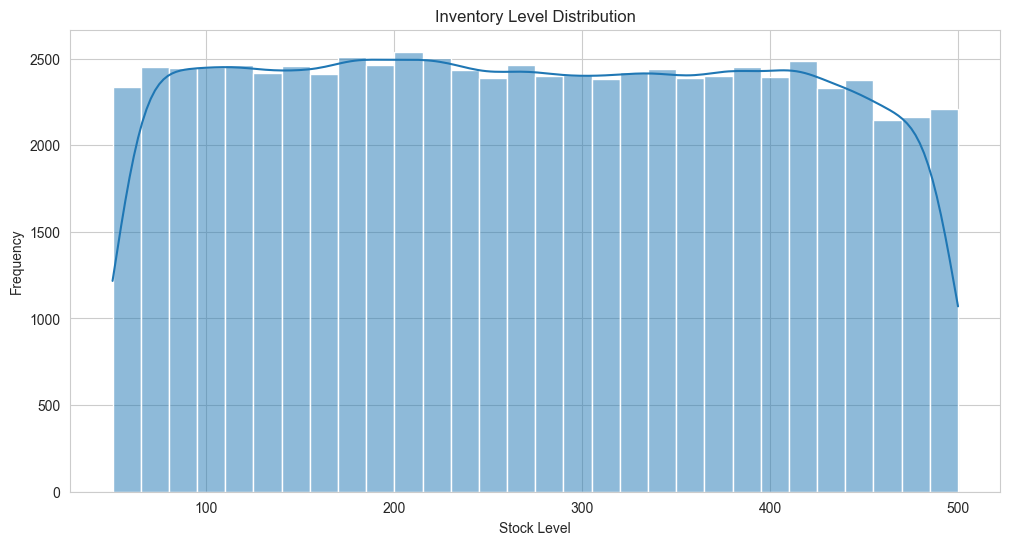

In [44]:
plt.figure()
sns.histplot(df["Inventory Level"], bins=30, kde=True)
plt.title("Inventory Level Distribution")
plt.xlabel("Stock Level")
plt.ylabel("Frequency")
plt.show()


<h2>Sales vs Inventory Level

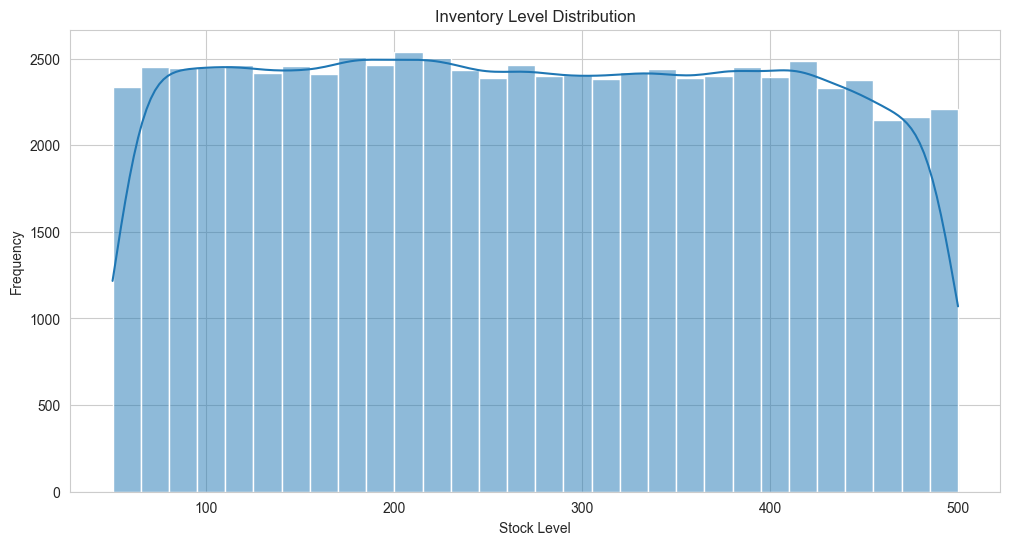

In [45]:
plt.figure()
sns.histplot(df["Inventory Level"], bins=30, kde=True)
plt.title("Inventory Level Distribution")
plt.xlabel("Stock Level")
plt.ylabel("Frequency")
plt.show()


<h2>Units Sold by Category

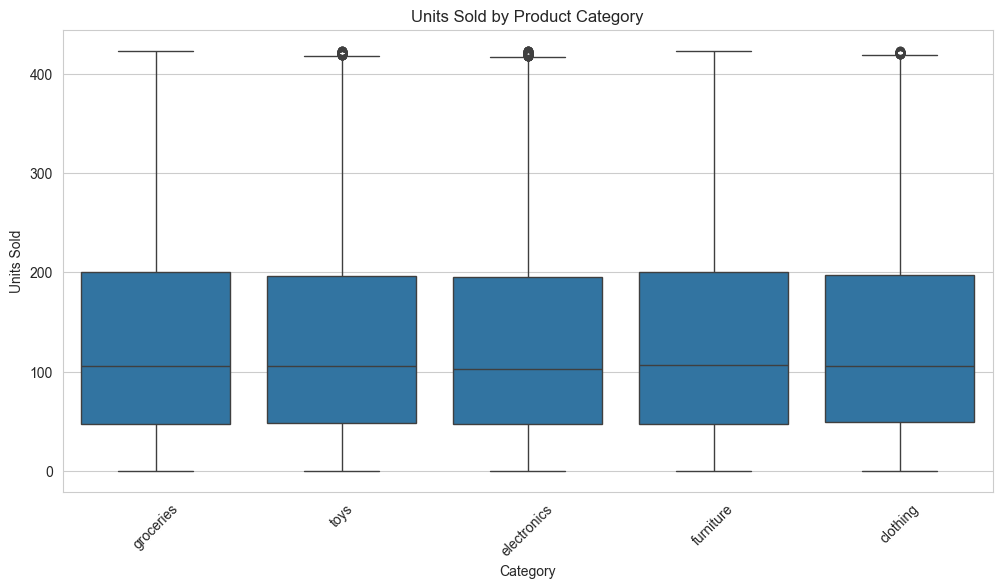

In [46]:
plt.figure()
sns.boxplot(x="Category", y="Units Sold", data=df)
plt.xticks(rotation=45)
plt.title("Units Sold by Product Category")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.show()


<h2>Stock Levels by Region

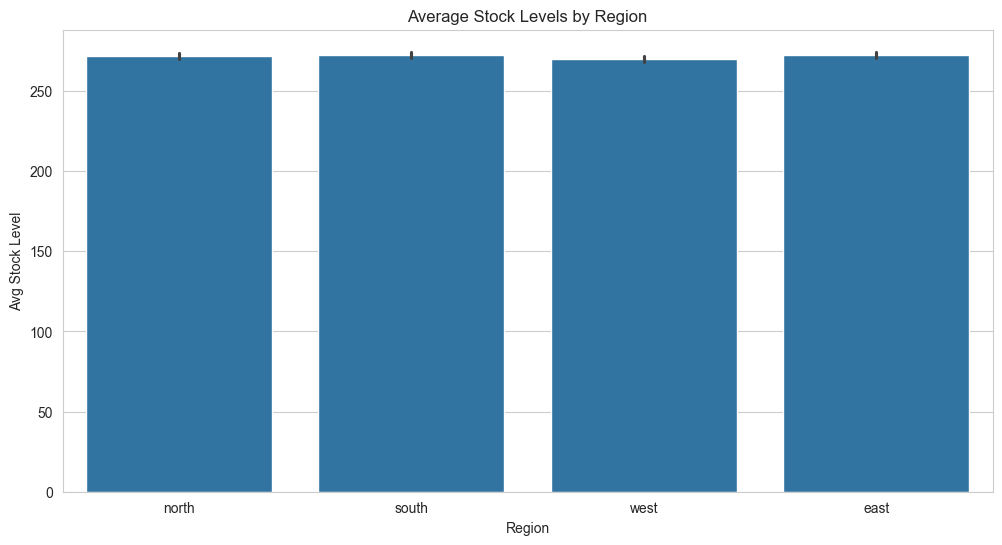

In [47]:
plt.figure()
sns.barplot(x="Region", y="Inventory Level", data=df, estimator=np.mean)
plt.title("Average Stock Levels by Region")
plt.xlabel("Region")
plt.ylabel("Avg Stock Level")
plt.show()


<h2> checking if the new columns are added or not

In [48]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Stock Status,Sales Efficiency
0,2022-01-01,s001,p0001,groceries,north,231,127,55,135.47,33.50,20,rainy,0,29.69,autumn,Sufficient Stock,2.267857
1,2022-01-01,s001,p0002,toys,south,204,150,66,144.04,63.01,20,sunny,0,66.16,autumn,Sufficient Stock,2.238806
2,2022-01-01,s001,p0003,toys,west,102,65,51,74.02,27.99,10,sunny,1,31.32,summer,Sufficient Stock,1.250000
3,2022-01-01,s001,p0004,toys,north,469,61,164,62.18,32.72,10,cloudy,1,34.74,autumn,Sufficient Stock,0.369697
4,2022-01-01,s001,p0005,electronics,east,166,14,135,9.26,73.64,0,sunny,0,68.95,summer,Sufficient Stock,0.102941


<h2>Histogram & KDE for Quantity

In [ ]:
# Group data by 'Product_Category' and sum the stock levels
product_stock_distribution = df.groupby('Product_Category')['Stock_Level'].sum()

# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 6))
product_stock_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1', ax=ax)

# Formatting
ax.set_title("Stock Distribution Across Product Categories", fontsize=14)
ax.set_ylabel('')
plt.show()


KeyError: 'Dealer_Name'

In [50]:
# -----------------------------------------------
def remove_outliers(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        z_scores = np.abs(stats.zscore(df[column]))
        df = df[z_scores < 3]

    return df


In [51]:
for col in ["Inventory Level", "Units Sold", "Price"]:
    df = remove_outliers(df, col)

print("\n✅ Outliers Handled Successfully!")


✅ Outliers Handled Successfully!


In [52]:
def create_new_features(df):
    """Generates new meaningful columns for better insights"""
    df["Stock Status"] = np.where(df["Inventory Level"] < 50, "Low Stock", "Sufficient Stock")

    # Create Sales Efficiency Ratio
    df["Sales Efficiency"] = df["Units Sold"] / (df["Units Ordered"] + 1)

    return df

# Apply feature engineering
df = create_new_features(df)

print("\n✅ Feature Engineering Completed!")



✅ Feature Engineering Completed!


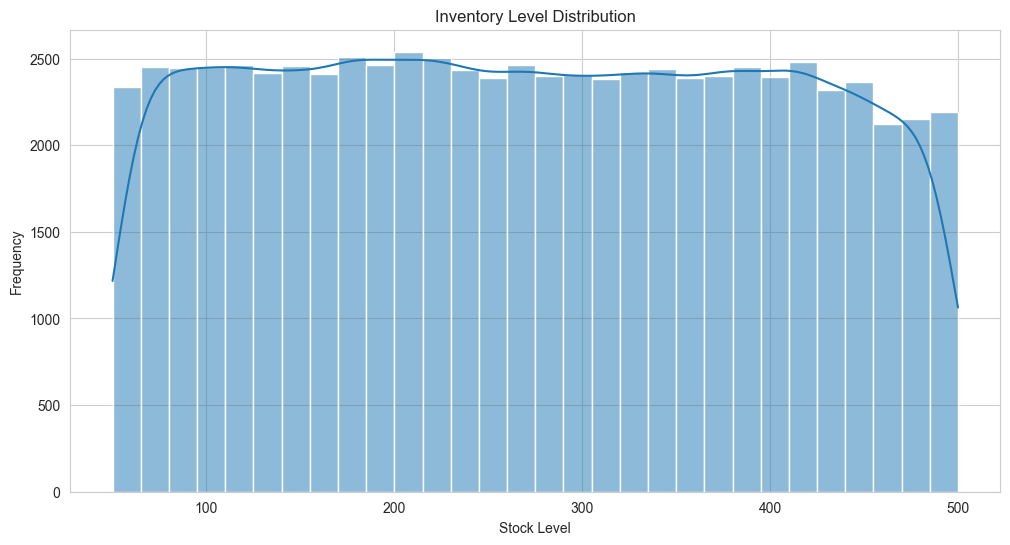

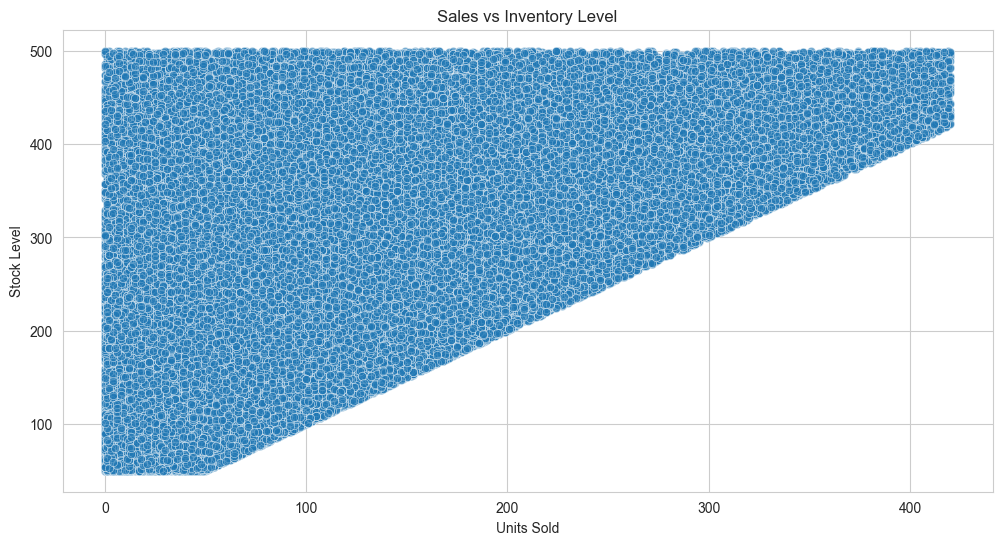

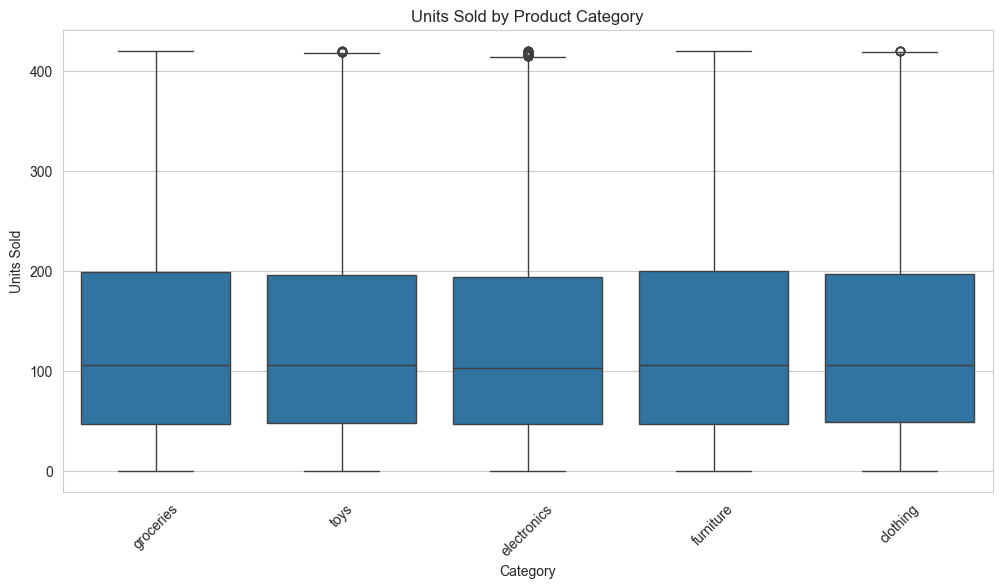

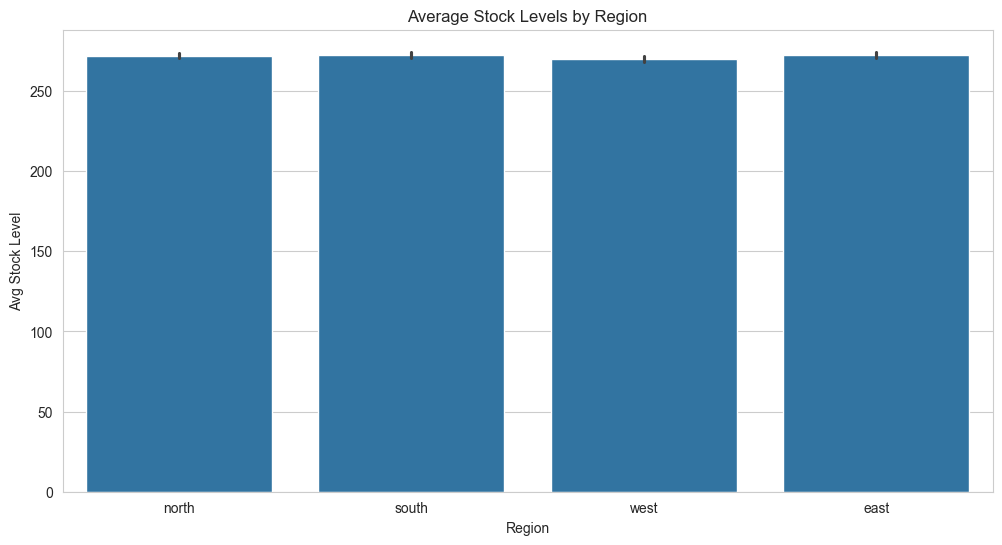

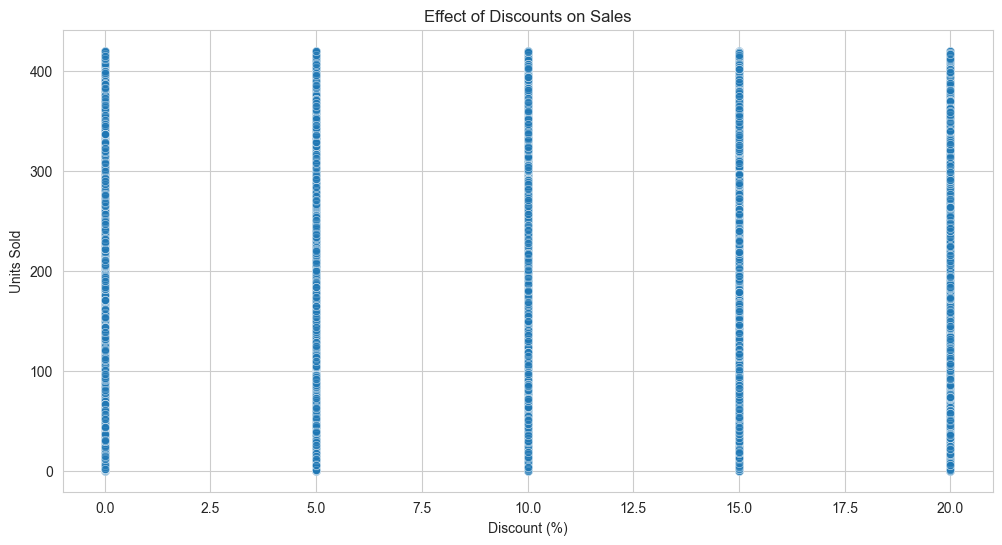

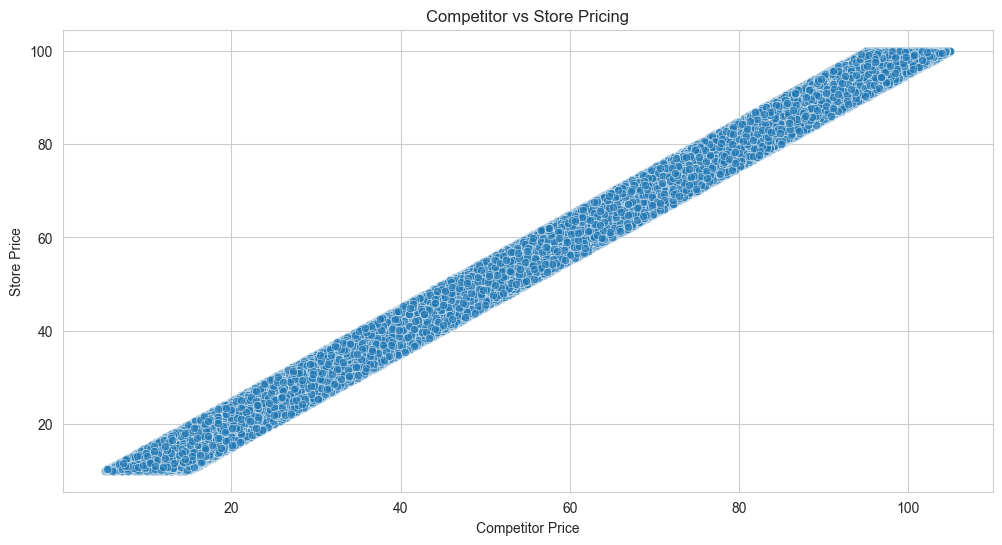


✅ Data Visualization Completed!


In [53]:
def plot_data(df):
    """Generates key visualizations for data insights"""
    
    # 📊 Inventory Level Distribution
    plt.figure()
    sns.histplot(df["Inventory Level"], bins=30, kde=True)
    plt.title("Inventory Level Distribution")
    plt.xlabel("Stock Level")
    plt.ylabel("Frequency")
    plt.show()

    # 📊 Sales vs Inventory Level
    plt.figure()
    sns.scatterplot(x=df["Units Sold"], y=df["Inventory Level"], alpha=0.6)
    plt.title("Sales vs Inventory Level")
    plt.xlabel("Units Sold")
    plt.ylabel("Stock Level")
    plt.show()

    # 📊 Units Sold by Category
    plt.figure()
    sns.boxplot(x="Category", y="Units Sold", data=df)
    plt.xticks(rotation=45)
    plt.title("Units Sold by Product Category")
    plt.xlabel("Category")
    plt.ylabel("Units Sold")
    plt.show()

    
    plt.figure()
    sns.barplot(x="Region", y="Inventory Level", data=df, estimator=np.mean)
    plt.title("Average Stock Levels by Region")
    plt.xlabel("Region")
    plt.ylabel("Avg Stock Level")
    plt.show()

    
    plt.figure()
    sns.scatterplot(x=df["Discount"], y=df["Units Sold"], alpha=0.6)
    plt.title("Effect of Discounts on Sales")
    plt.xlabel("Discount (%)")
    plt.ylabel("Units Sold")
    plt.show()


    plt.figure()
    sns.scatterplot(x=df["Competitor Pricing"], y=df["Price"], alpha=0.6)
    plt.title("Competitor vs Store Pricing")
    plt.xlabel("Competitor Price")
    plt.ylabel("Store Price")
    plt.show()

# Call visualization function
plot_data(df)

print("\n✅ Data Visualization Completed!")

In [18]:
cleaned_file_path = "retail_store_inventory.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned Data Saved at: {cleaned_file_path}")

Cleaned Data Saved at: retail_store_inventory.csv
